In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=cv2.imread('coffee.jpg')

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(184, 274, 3)

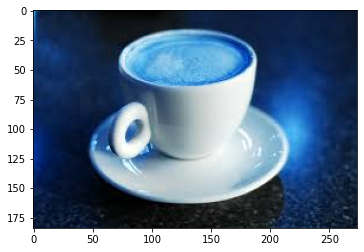

In [5]:
plt.imshow(img)
plt.show()

In [6]:
cv2.imshow('coffee',img)
cv2.waitKey()
cv2.destroyAllWindows()

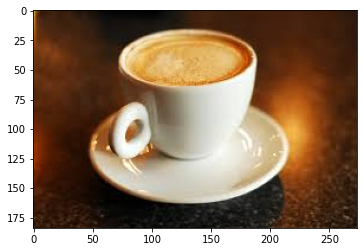

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [8]:
img2=img.copy()
img2[:,:,[1,2]]=0 #(r,g,b) --> (0,1,2)

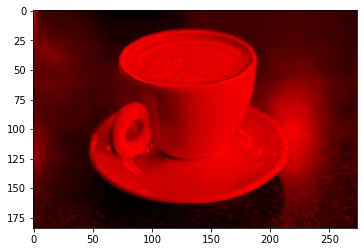

In [9]:
plt.imshow(img2)

In [10]:
cv2.imwrite('red.jpg',cv2.cvtColor(img2,cv2.COLOR_RGB2BGR))

True

## GrayScalling

Y = 0.299 R + 0.587 G + 0.114 B

In [11]:
img2=img.copy()

In [12]:
img2.shape

(184, 274, 3)

In [13]:
img2=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

In [14]:
img2.shape

(184, 274)

In [15]:
cv2.imshow('gray',img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
# `Y = 0.299 R + 0.587 G + 0.114 B`
round(0.299 * img[0,0,0] + 0.587 * img[0,0,1] + 0.114 * img[0,0,2])

176

In [17]:
img2[0, 0]

176

## Histogram

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

In [18]:
img=cv2.imread('coffee.jpg')

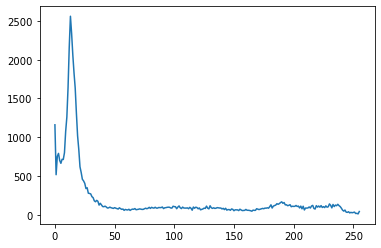

In [19]:
his=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(his)

In [21]:
equ=cv2.equalizeHist(img)
his=cv2.calcHist([equ],[0],None,[256],[0,256])
plt.plot(his)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [29]:
cv2.imshow('Before', img)
cv2.imshow('After', equ)
cv2.waitKey()
cv2.destroyAllWindows()

NameError: name 'equ' is not defined

# Drawing img

In [31]:
img=cv2.imread('coffee.jpg')
img[:,:,0].shape  #(rows,columns)

(184, 274)

Lines cv2.line(image, start_point, end_point, color, thickness) --> returns image

In [32]:
img2 = img.copy()
cv2.line(img2, (0,0), (137, 92), (120,200,165), 2)

cv2.imshow("Blue Line", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rectangle=> cv2.rectangle(image, starting vertex, opposite vertex, color, thickness) --> returns image

In [34]:
img2 = img.copy()
cv2.rectangle(img2, (40,10), (220, 170), (0,0,0), 1)


cv2.imshow("Rect", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Circles cv2.cirlce(image, center, radius, color, thickness) --> returns image

In [35]:
img2 = img.copy()
cv2.circle(img2, (int(img2.shape[1]/2), int(img2.shape[0]/2)), 90, (0,0,0), -1)


cv2.imshow("Rect", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

polylines=>cv2.polylines(image, [pts], isClosed, color, thickness)

In [36]:
pts = np.array([[25, 70], [25, 160], [110, 20]],
               np.int32)
               
print(pts.shape)

# # Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))
print(pts.shape)

(3, 2)
(3, 1, 2)


In [37]:
img2 = img.copy()
cv2.polylines(img2, [pts], 1, (0,0,0), 3)


cv2.imshow("Rect", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Text
cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)

In [38]:
img2 = img.copy()
cv2.putText(img2, 'Latte', (50,180), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 2, (204, 174, 136), 2)
cv2.imshow("Text", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Translation, Rotation, Scaling

### Translation

cv2.warpAffine(Source, Transformation, (Destination)

In [39]:
T = np.float32([[1, 0, 150], [0, 1, 150]])

img2 = cv2.warpAffine(img, T, (int(img.shape[1]*2), int(img.shape[0]*2)))
cv2.imshow('Translation', img2)
cv2.waitKey()
cv2.destroyAllWindows()

### Rotation

cv2.getRotationMatrix2D(new_center_x, new_center_y, angle of rotation, scale)

In [40]:
img.shape

(184, 274, 3)

In [42]:
rot_mat=cv2.getRotationMatrix2D((274/2,184/2),90,1)
rot_mat

array([[ 6.123234e-17,  1.000000e+00,  4.500000e+01],
       [-1.000000e+00,  6.123234e-17,  2.290000e+02]])

In [43]:
rot_img=cv2.warpAffine(img,rot_mat,(img.shape[0],img.shape[1]))
cv2.imshow('rot',rot_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
# 0 --> x-axis flip , 1 -->  y-axis flip
flipped = cv2.flip(img, 1)
cv2.imshow('Flip', flipped) 
cv2.waitKey()
cv2.destroyAllWindows()

### Scaling

cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)

In [45]:
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(img, None, fx=0.75, fy=0.75)
cv2.imshow('Scaling - Linear Interpolation', image_scaled) 
cv2.waitKey()
cv2.destroyAllWindows()

# Let's double the size of our image
img_scaled = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
cv2.waitKey()
cv2.destroyAllWindows()

# Let's skew the re-sizing by setting exact dimensions
img_scaled = cv2.resize(img, (900, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled) 
cv2.waitKey()
cv2.destroyAllWindows()

In [46]:
smaller = cv2.pyrDown(img)
larger = cv2.pyrUp(smaller)

cv2.imshow('Original', img)
cv2.imshow('Smaller ', smaller )
cv2.imshow('Larger ', larger )
cv2.waitKey(0)
cv2.destroyAllWindows()

# Arithmetic Operations & Bitwise Operations


## Arithmetic Operations

In [50]:
img = cv2.imread('Trump.jpg',0)

# Create a matrix of ones, then multiply it by a scaler 
# This gives a matrix with same dimesions of our image with all values being the scalar value
M = np.ones(img.shape, dtype = "uint8") * 175

# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(img, M)
cv2.imshow("Added", added)

# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(img, M)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Bitwise Operations

In [51]:
# Making a sqare
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2.imshow("Square", square)
cv2.waitKey(0)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [52]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", And)
cv2.waitKey(0)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0) 

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
cv2.imshow("NOT - square", bitwiseNot_sq)
cv2.waitKey(0)

### Notice the last operation inverts the image totally

cv2.destroyAllWindows()

## Thresholding, Binarization & Adaptive Thresholding

In thresholding, we convert a grey scale image to it's binary form.

In [53]:
image = cv2.imread('gradient.jpg',0)
cv2.imshow('Original', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Filtering Colour

In [54]:
img=cv2.imread('Sunflowers.jpg')

In [56]:
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower=np.array([22,93,0],dtype='uint8')
upper=np.array([45,255,255],dtype='uint8')
mask=cv2.inRange(img_hsv,lower,upper)

In [57]:
res=cv2.bitwise_and(img,img,mask=mask)
cv2.imshow('original',img)
cv2.imshow('mask',mask)
cv2.imshow('filtered',res)
cv2.waitKey()
cv2.destroyAllWindows()

# Task

In [59]:
img=cv2.imread('Scan.jpg')

For the first task, you can first the utilize the following information to use cv2.getPerspectiveTransform and cv2.warpPerspective

Cordinates of the 4 corners of the original image --> points_A = np.float32([[320,15], [700,215], [85,610], [530,780]]) can you get them interactively by mouse clicks?

Cordinates of the 4 corners of the desired output using a ratio of an A4 Paper 1 : 1.41 --> points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])

## Get the correct prespective

In [61]:
points_A=np.float32([[320,15], [700,215], [85,610], [530,780]])
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])

matrix=cv2.getPerspectiveTransform(points_A,points_B)
res=cv2.warpPerspective(img,matrix,(500,600))

cv2.imshow('org',img)
cv2.imshow('res',res)

cv2.waitKey()
cv2.destroyAllWindows()

## Convert it to binary (black and white) using thresholding on grayscaled image

In [62]:
img2=img.copy()

In [63]:
img2=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
cv2.imshow('Gray',img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [67]:
ret,thresh1 = cv2.threshold(img3, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)
cv2.waitKey()
cv2.destroyAllWindows()
